# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

plt.style.use("default")

# Load Dataset

In [2]:
df = pd.read_csv("Social Media Engagement Dataset.csv")
df.head()

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,...,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,...,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_id                  12000 non-null  object 
 1   timestamp                12000 non-null  object 
 2   day_of_week              12000 non-null  object 
 3   platform                 12000 non-null  object 
 4   user_id                  12000 non-null  object 
 5   location                 12000 non-null  object 
 6   language                 12000 non-null  object 
 7   text_content             12000 non-null  object 
 8   hashtags                 12000 non-null  object 
 9   mentions                 8059 non-null   object 
 10  keywords                 12000 non-null  object 
 11  topic_category           12000 non-null  object 
 12  sentiment_score          12000 non-null  float64
 13  sentiment_label          12000 non-null  object 
 14  emotion_type          

In [4]:
df.describe()

,sentiment_score,toxicity_score,likes_count,shares_count,comments_count,impressions,engagement_rate,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
count,12000.000000,12000.000000,12000.00000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.000553,0.503868,2490.72025,1007.167167,504.34575,49811.338500,0.278137,0.001472,0.000998,0.729692
std,0.583563,0.288198,1441.53253,575.072282,288.68416,28930.289451,1.149206,0.576627,0.289940,57.787219
min,-0.999800,0.000000,0.00000,0.000000,0.00000,130.000000,0.001880,-0.999600,-0.499900,-99.900000
25%,-0.503200,0.251400,1236.00000,510.000000,253.00000,24716.500000,0.049100,-0.495975,-0.248400,-48.700000
50%,-0.006200,0.505950,2496.00000,1018.000000,503.00000,49674.000000,0.080605,0.001950,0.002800,0.900000
75%,0.513525,0.756200,3723.25000,1501.000000,755.00000,74815.000000,0.163123,0.501725,0.250700,50.100000
max,0.999900,0.999900,5000.00000,2000.000000,1000.00000,99997.000000,32.211710,0.999400,0.499900,99.900000


In [5]:
df.isnull().sum()

post_id                       0
timestamp                     0
day_of_week                   0
platform                      0
user_id                       0
location                      0
language                      0
text_content                  0
hashtags                      0
mentions                   3941
keywords                      0
topic_category                0
sentiment_score               0
sentiment_label               0
emotion_type                  0
toxicity_score                0
likes_count                   0
shares_count                  0
comments_count                0
impressions                   0
engagement_rate               0
brand_name                    0
product_name                  0
campaign_name                 0
campaign_phase                0
user_past_sentiment_avg       0
user_engagement_growth        0
buzz_change_rate              0
dtype: int64

# Data Preprocessing

In [6]:
# Convert timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# Drop rows with invalid timestamps (very rare)
df = df.dropna(subset=["timestamp"])

# Extract hour for time-based analysis
df["hour"] = df["timestamp"].dt.hour

# Weekend flag
df["is_weekend"] = df["day_of_week"].isin(["Saturday", "Sunday"])

# Standardize categorical values (avoid duplicates like instagram / Instagram)
df["platform"] = df["platform"].str.strip().str.title()
df["topic_category"] = df["topic_category"].str.strip().str.title()
df["campaign_phase"] = df["campaign_phase"].str.strip().str.title()

# Handle missing mentions (missing = no mentions)
df["mentions"] = df["mentions"].fillna("")

# Feature engineering
df["caption_length"] = df["text_content"].astype(str).apply(len)

df["hashtag_count"] = df["hashtags"].astype(str).apply(
    lambda x: len(x.split(",")) if x.strip() != "" else 0
)

df["mentions_count"] = df["mentions"].apply(
    lambda x: len(x.split(",")) if x.strip() != "" else 0
)

# Posting frequency: total posts per user in this dataset
df["user_post_frequency"] = df.groupby("user_id")["post_id"].transform("count")

# Remove extreme outliers in engagement rate (1st–99th percentile)
q1 = df["engagement_rate"].quantile(0.01)
q99 = df["engagement_rate"].quantile(0.99)

df = df[(df["engagement_rate"] >= q1) & (df["engagement_rate"] <= q99)]

df.head()

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate,hour,is_weekend,caption_length,hashtag_count,mentions_count,user_post_frequency
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,,...,Launch,0.0953,-0.3672,19.1,11,False,108,1,0,1
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,Post-Launch,0.1369,-0.4510,-42.6,19,True,109,2,2,1
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",,...,Post-Launch,0.2855,-0.4112,17.4,14,True,114,3,0,1
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,Youtube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,Launch,-0.2094,-0.0167,-5.5,4,False,99,2,2,1
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,Launch,0.6867,0.0807,38.8,21,False,118,2,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11760 entries, 0 to 11999
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   post_id                  11760 non-null  object        
 1   timestamp                11760 non-null  datetime64[ns]
 2   day_of_week              11760 non-null  object        
 3   platform                 11760 non-null  object        
 4   user_id                  11760 non-null  object        
 5   location                 11760 non-null  object        
 6   language                 11760 non-null  object        
 7   text_content             11760 non-null  object        
 8   hashtags                 11760 non-null  object        
 9   mentions                 11760 non-null  object        
 10  keywords                 11760 non-null  object        
 11  topic_category           11760 non-null  object        
 12  sentiment_score          11760 non-nu

# EDA SECTION

# Engagement Rate by Content Type

In [8]:
content_engagement = (
    df.groupby("topic_category")["engagement_rate"]
    .mean()
    .sort_values(ascending=False)
)

content_engagement

topic_category
Delivery     0.196651
Product      0.196438
Returns      0.191238
Support      0.188598
Marketing    0.180433
Pricing      0.178871
Name: engagement_rate, dtype: float64

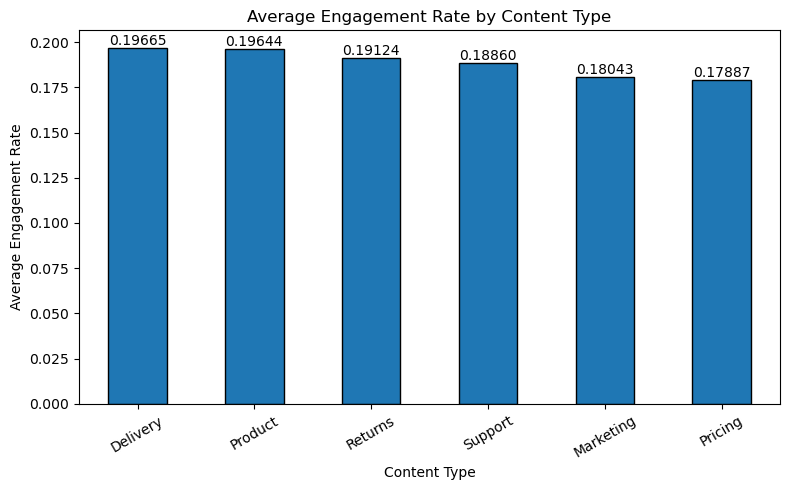

In [9]:
plt.figure(figsize=(8,5))

ax = content_engagement.plot(
    kind="bar",
    edgecolor="black"
)

plt.title("Average Engagement Rate by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Average Engagement Rate")
plt.xticks(rotation=30)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.5f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()

# Delivery and Product-related content achieve the highest engagement rates, while Marketing and Pricing content show comparatively lower engagement.

# Followers (Impressions) vs Engagement Rate

In [10]:
corr_followers = df["impressions"].corr(df["engagement_rate"])
print(f"Correlation between impressions and engagement rate: {corr_followers:.2f}")

Correlation between impressions and engagement rate: -0.51


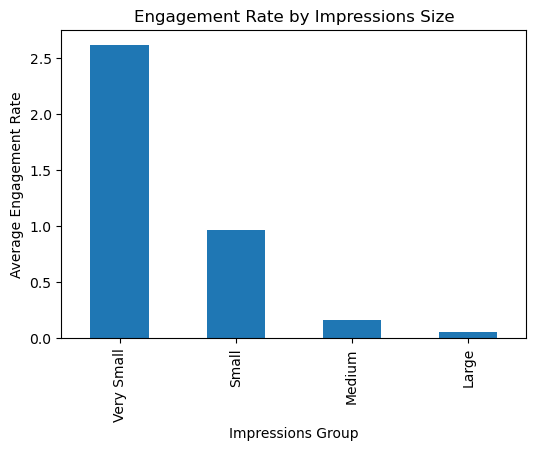

In [11]:
# Create follower groups
df["follower_group"] = pd.cut(
    df["impressions"],
    bins=[0, 1000, 10000, 50000, 100000],
    labels=["Very Small", "Small", "Medium", "Large"]
)

group_engagement = (
    df.groupby("follower_group", observed=True)["engagement_rate"]
    .mean()
)

group_engagement.plot(kind="bar", figsize=(6,4))
plt.xlabel("Impressions Group")
plt.ylabel("Average Engagement Rate")
plt.title("Engagement Rate by Impressions Size")
plt.show()

# As follower size increases, engagement rate decreases.

# Weekend vs Weekday Engagement

In [12]:
weekend_engagement = (
    df.groupby("is_weekend")["engagement_rate"]
    .mean()
    .rename(index={False: "Weekday", True: "Weekend"})
    .round(3)
)

weekend_engagement

is_weekend
Weekday    0.187
Weekend    0.192
Name: engagement_rate, dtype: float64

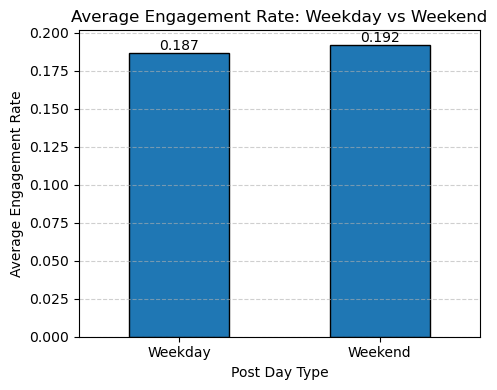

In [13]:
plt.figure(figsize=(5,4))

ax = weekend_engagement.plot(
    kind="bar",
    edgecolor="black"
)

plt.title("Average Engagement Rate: Weekday vs Weekend")
plt.xlabel("Post Day Type")
plt.ylabel("Average Engagement Rate")

plt.xticks([0, 1], ["Weekday", "Weekend"], rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add values on bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.3f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()

# Weekend posts show a marginally higher engagement rate than weekday posts, but the difference is very small.

# Posting Time Buckets

In [14]:
def time_bucket(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 22:
        return "Evening"
    else:
        return "Night"

df["time_bucket"] = df["hour"].apply(time_bucket)

In [15]:
time_engagement = (
    df.groupby("time_bucket")[["likes_count","comments_count","shares_count"]]
    .mean()
    .reindex(["Morning", "Afternoon", "Evening", "Night"])
    .round(0)
)

time_engagement

,likes_count,comments_count,shares_count
time_bucket,,,
Morning,2508.0,502.0,1008.0
Afternoon,2486.0,500.0,1001.0
Evening,2513.0,518.0,1035.0
Night,2522.0,509.0,1013.0


<Figure size 700x400 with 0 Axes>

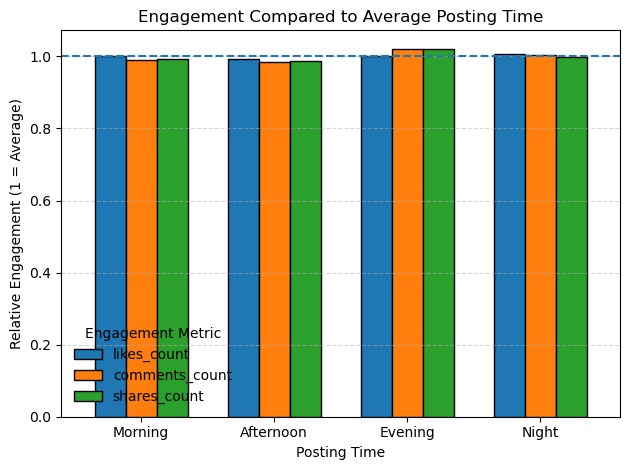

In [16]:
relative_to_avg = time_engagement / time_engagement.mean()

plt.figure(figsize=(7,4))

relative_to_avg.plot(
    kind="bar",
    edgecolor="black",
    width=0.7
)

plt.title("Engagement Compared to Average Posting Time")
plt.xlabel("Posting Time")
plt.ylabel("Relative Engagement (1 = Average)")

plt.axhline(1, linestyle="--")  # average line
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Engagement Metric", frameon=False)

plt.tight_layout()
plt.show()

# Engagement is slightly higher in the Evening and Night, while Afternoon consistently shows the lowest likes, comments, and shares.

# Correlation Analysis

In [17]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", RuntimeWarning)
    
    corr_features = {
        "Hashtag Count": df["hashtag_count"].corr(df["engagement_rate"]),
        "Caption Length": df["caption_length"].corr(df["engagement_rate"]),
        "User Post Frequency": df["user_post_frequency"].corr(df["engagement_rate"])
    }

pd.Series(corr_features)

# Hashtag count, caption length, and posting frequency show almost no correlation with engagement rate, indicating minimal direct impact.

Hashtag Count         -0.014691
Caption Length        -0.010181
User Post Frequency         NaN
dtype: float64

# Platform-wise Engagement

In [18]:
platform_engagement = (
    df.groupby("platform")["engagement_rate"]
    .mean()
    .sort_values(ascending=False)
)

platform_engagement

platform
Instagram    0.193397
Facebook     0.192565
Twitter      0.186953
Reddit       0.186321
Youtube      0.183914
Name: engagement_rate, dtype: float64

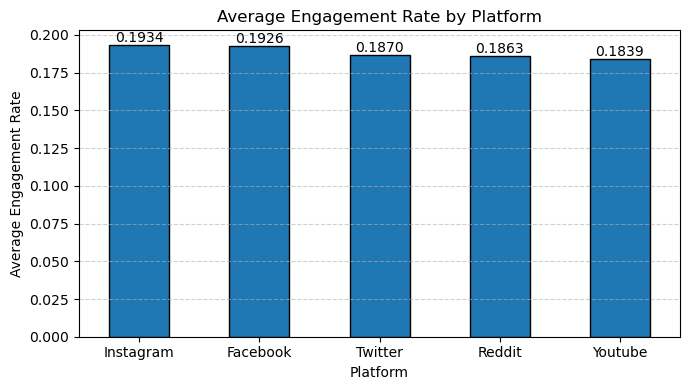

In [19]:
plt.figure(figsize=(7,4))

ax = platform_engagement.plot(
    kind="bar",
    edgecolor="black"
)

plt.title("Average Engagement Rate by Platform")
plt.xlabel("Platform")
plt.ylabel("Average Engagement Rate")

plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add values on bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.4f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()

# Instagram and Facebook show the highest average engagement rates, while YouTube records the lowest, with differences across platforms being relatively small.

In [20]:
df['promo_signal'] = np.where(
    (df['impressions'] > df['impressions'].quantile(0.75)) &
    (df['hashtags'].str.contains('promo|ad|sponsored', case=False, na=False)),
    'Likely Paid',
    'Likely Organic'
)

In [21]:
df['promo_signal'].value_counts()

promo_signal
Likely Organic    11545
Likely Paid         215
Name: count, dtype: int64

In [22]:
promo_content_engagement = (df.groupby(["topic_category", "promo_signal"])["engagement_rate"] .mean() .reset_index())

promo_table = (
    promo_content_engagement
    .pivot(index="topic_category", columns="promo_signal", values="engagement_rate")
    .round(3)
)

promo_table

promo_signal,Likely Organic,Likely Paid
topic_category,,
Delivery,0.199,0.046
Marketing,0.183,0.049
Pricing,0.181,0.046
Product,0.199,0.049
Returns,0.194,0.045
Support,0.191,0.046


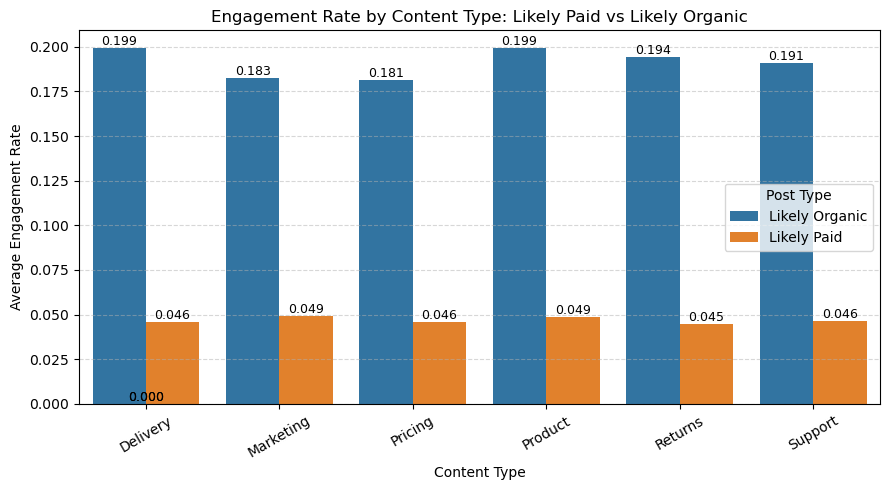

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))

ax = sns.barplot(
    data=promo_content_engagement,
    x="topic_category",
    y="engagement_rate",
    hue="promo_signal"
)

plt.title("Engagement Rate by Content Type: Likely Paid vs Likely Organic")
plt.xlabel("Content Type")
plt.ylabel("Average Engagement Rate")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Post Type")

# Add values on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.3f}",
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()

#Across all content types, likely organic posts achieve significantly higher engagement rates than likely paid posts, indicating that paid promotion does not translate into higher engagement quality.

# Engagement Rate by Sentiment Label

In [24]:
sentiment_label_engagement = (
    df.groupby("sentiment_label", observed=True)["engagement_rate"]
    .mean()
    .round(3)
)

sentiment_label_engagement

sentiment_label
Negative    0.194
Neutral     0.188
Positive    0.183
Name: engagement_rate, dtype: float64

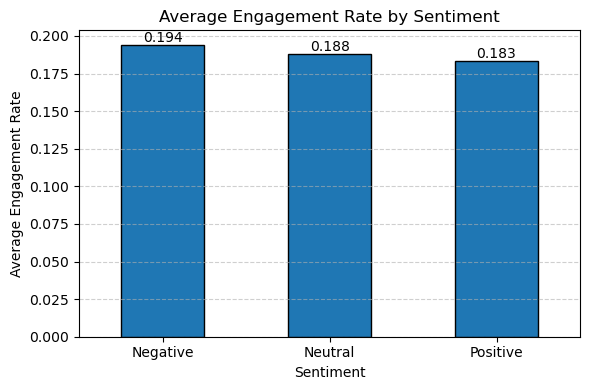

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

ax = sentiment_label_engagement.plot(
    kind="bar",
    edgecolor="black"
)

plt.title("Average Engagement Rate by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Engagement Rate")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add values on bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.3f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()

# Posts with negative sentiment receive the highest engagement, followed by neutral content, while positive posts generate comparatively lower engagement.

# Platform × Content Type Interaction

In [26]:
platform_content = (
    df.groupby(["platform", "topic_category"], observed=True)["engagement_rate"]
    .mean()
    .round(3)
)

platform_content

platform_content_table = platform_content.unstack()
platform_content_table


topic_category,Delivery,Marketing,Pricing,Product,Returns,Support
platform,,,,,,
Facebook,0.203,0.192,0.178,0.198,0.202,0.180
Instagram,0.193,0.186,0.173,0.187,0.207,0.217
Reddit,0.191,0.174,0.161,0.217,0.198,0.180
Twitter,0.201,0.172,0.202,0.199,0.162,0.186
Youtube,0.195,0.179,0.180,0.180,0.187,0.182


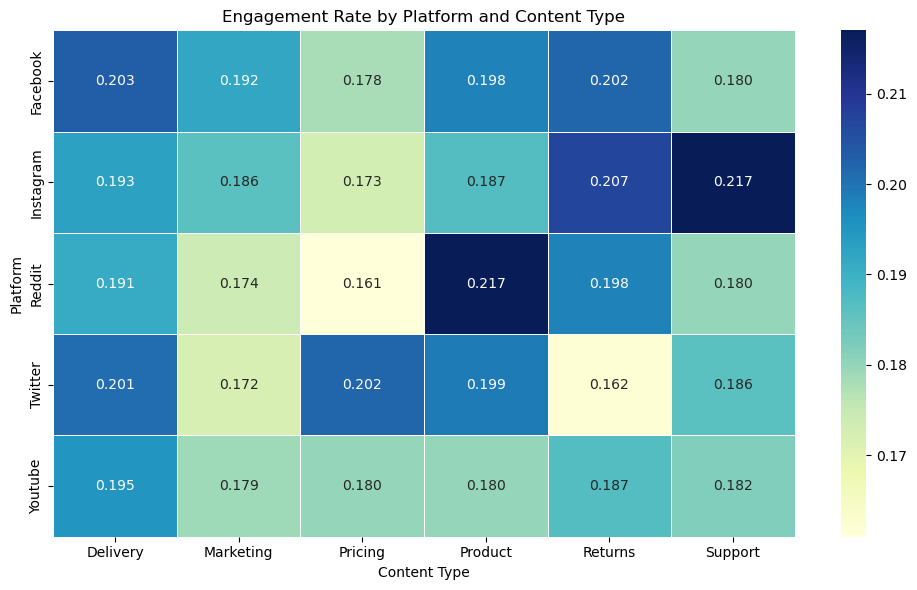

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.heatmap(
    platform_content_table,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5
)

plt.title("Engagement Rate by Platform and Content Type")
plt.xlabel("Content Type")
plt.ylabel("Platform")

plt.tight_layout()
plt.show()

# ML SECTION

# Feature Selection

In [31]:
# Define features and target
features = [
    "topic_category",
    "platform",
    "campaign_phase",
    "hashtag_count",
    "caption_length",
    "mentions_count",
    "impressions",
    "sentiment_score",
    "toxicity_score",
    "hour",
    "likes_count",
    "shares_count",
    "comments_count",
    "user_past_sentiment_avg",
    "user_engagement_growth",
    "buzz_change_rate",
    "user_post_frequency",
    "is_weekend"
]

target = "engagement_rate"

X = df[features]
y = df[target]

# Train-Test Split

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Preprocessing Pipeline

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = [
    "topic_category",
    "platform",
    "campaign_phase",
    "is_weekend"
]

numeric_features = list(set(features) - set(categorical_features))

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

# Model Building

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(
            n_estimators=500,
            max_depth=15,
            min_samples_split=10,
            min_samples_leaf=4,
            random_state=42,
            n_jobs=-1
        ))
    ]
)

# Model Training

In [40]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['topic_category', 'platform',
                                                   'campaign_phase',
                                                   'is_weekend']),
                                                 ('num', 'passthrough',
                                                  ['sentiment_score',
                                                   'comments_count',
                                                   'caption_length', 'hour',
                                                   'shares_count',
                                                   'user_engagement_growth',
                                                   'hashtag_count',
                                                   'user_post_frequency',
                                                   'toxicity_score',
                                                   'buzz_change_rate',
                                                   'user_past_sentiment_avg',
                                                   'likes_count',
                                                   'mentions_count',
                                                   'impressions'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=4,
                                       min_samples_split=10, n_estimators=500,
                                       n_jobs=-1, random_state=42))])

# Model Evaluation

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Performance:")
print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

Model Performance:
R2 Score: 0.9780
MAE: 0.0153
RMSE: 0.0618


# Feature Importance

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature names after encoding
encoded_features = model.named_steps["preprocessor"] \
    .named_transformers_["cat"] \
    .get_feature_names_out(categorical_features)

all_features = list(encoded_features) + numeric_features

importances = model.named_steps["regressor"].feature_importances_

feature_importance = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance.head(10))

                    Feature  Importance
29              impressions    0.874058
27              likes_count    0.106233
20             shares_count    0.010352
17           comments_count    0.002307
26  user_past_sentiment_avg    0.001394
24           toxicity_score    0.001192
16          sentiment_score    0.000918
25         buzz_change_rate    0.000782
19                     hour    0.000582
18           caption_length    0.000476


<Figure size 1000x600 with 0 Axes>

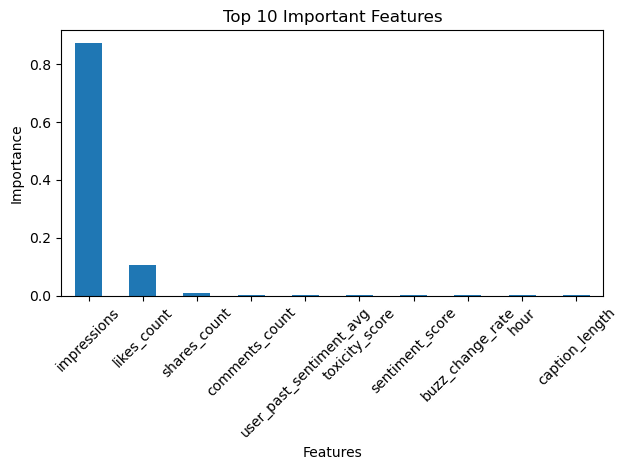

In [44]:
plt.figure(figsize=(10,6))

feature_importance.head(10).plot(
    x="Feature",
    y="Importance",
    kind="bar",
    legend=False
)

plt.title("Top 10 Important Features")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()